<a href="https://colab.research.google.com/github/ThiagoBalbo16/Course-DDS4-FLAI/blob/main/Class_09_Cross_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Course: Curso Dominando Data Science [FLAI]  \\
Description: Machine Larning: Cross Validation \\
Author: FLAI \\
Adapted by : Thiago Balbo Batista \\
Year: 2021 \\

In [1]:
# Import the dataset via github:

import pandas as pd
url = 'https://raw.githubusercontent.com/ThiagoBalbo16/Course-Dominando-Data-Science-DDS4-FLAI/main/insurance.csv'
data = pd.read_csv(url)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})
data['charges'] = data['charges']/1000 
data = data[['bmi', 'smoker', 'charges']]
data.head()

,bmi,smoker,charges
0,27.900,1,16.884924
1,33.770,0,1.725552
2,33.000,0,4.449462
3,22.705,0,21.984471
4,28.880,0,3.866855


### Upgrade the Validation: K-Fold:

In [3]:
# Configurate the cross validation:

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

In [8]:
validation = KFold(n_splits = 10, shuffle = True)

#### Logistic Regression:

In [9]:
from sklearn.linear_model import LogisticRegression 

X = data[['bmi', 'charges']]
y = data['smoker'] 

model = LogisticRegression()

In [11]:
logreg = cross_validate(model, X, y, cv = validation, 
                        scoring = ['accuracy', 'recall', 'precision'])

In [16]:
logreg

{'fit_time': array([0.017344  , 0.0098567 , 0.00965381, 0.01090026, 0.0101974 ,
        0.01008916, 0.00980806, 0.00952673, 0.00954938, 0.00933456]),
 'score_time': array([0.0031352 , 0.00313902, 0.00300956, 0.00332117, 0.00297546,
        0.00301099, 0.00301385, 0.00314307, 0.00295711, 0.0032804 ]),
 'test_accuracy': array([0.96268657, 0.88059701, 0.91044776, 0.94029851, 0.93283582,
        0.97014925, 0.94029851, 0.90298507, 0.96992481, 0.92481203]),
 'test_precision': array([0.86363636, 0.78125   , 0.90909091, 0.81481481, 0.85714286,
        0.96551724, 0.95454545, 0.8125    , 0.95454545, 0.76923077]),
 'test_recall': array([0.9047619 , 0.73529412, 0.66666667, 0.88      , 0.75      ,
        0.90322581, 0.75      , 0.78787879, 0.875     , 0.83333333])}

In [17]:
round(logreg['test_precision'].mean(), 4)

0.8682

In [ ]:
print('     Accuracy:', round(logreg['test_accuracy'].mean(), 4))
print('Sensitivity:', round(logreg['test_recall'].mean(), 4))
print('     Precision:', round(logreg['test_precision'].mean(), 4))

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


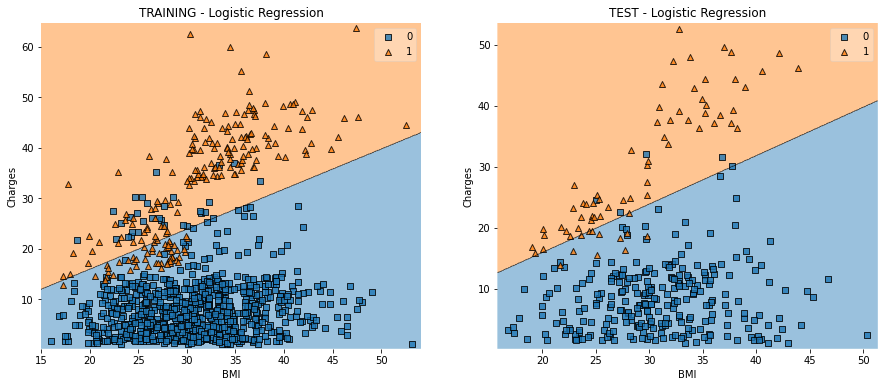

In [21]:
# Decision Regions:

from sklearn.model_selection import train_test_split 
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

X = data[['bmi', 'charges']]
y = data['smoker']

Xtraining, Xtest, ytraining, ytest  = train_test_split(X, y, test_size = 0.25)
 
model.fit(Xtraining, ytraining)

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
plot_decision_regions(Xtraining.values, ytraining.values, clf = model, legend = 1)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('TRAINING - Logistic Regression')  

plt.subplot(1, 2, 2)
plot_decision_regions(Xtest.values, ytest.values, clf = model, legend = 1)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('TEST - Logistic Regression')   

plt.show()

#### KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier 

X = data[['bmi', 'charges']]
y = data['smoker'] 

k = 27
model = KNeighborsClassifier(n_neighbors = k) 
logreg = cross_validate(model, X, y, cv = validation, scoring = ['accuracy', 'recall', 'precision']) 

print('     Accuracy:', round(logreg['test_accuracy'].mean(), 4))
print('Sensitibity:', round(logreg['test_recall'].mean(), 4))
print('     Precision:', round(logreg['test_precision'].mean(), 4))

     Accuracy: 0.9611
Sensitibity: 0.9662
     Precision: 0.8636


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


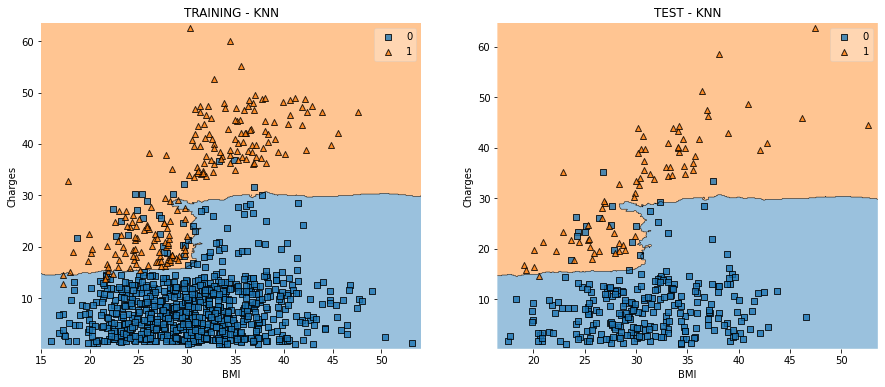

In [24]:
# Decision regions

from sklearn.model_selection import train_test_split 
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

X = data[['bmi', 'charges']]
y = data['smoker']

Xtraining, Xtest, ytraining, ytest  = train_test_split(X, y, test_size = 0.25)
 
model.fit(Xtraining, ytraining)

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
plot_decision_regions(Xtraining.values, ytraining.values, clf = model, legend = 1)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('TRAINING - KNN')  

plt.subplot(1, 2, 2)
plot_decision_regions(Xtest.values, ytest.values, clf = model, legend = 1)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('TEST - KNN')   

plt.show()

#### Decisions Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier

X = data[['bmi', 'charges']]
y = data['smoker'] 

depth = 3
model = DecisionTreeClassifier(max_depth = depth)
reg = cross_validate(model, X, y, cv = validation, scoring = ['accuracy', 'recall', 'precision']) 

print('     Accuracy:', round(reg['test_accuracy'].mean(), 4))
print('Sensitivity:', round(reg['test_recall'].mean(), 4))
print('     Precision:', round(reg['test_precision'].mean(), 4))

     Accuracy: 0.9641
Sensitivity: 0.9725
     Precision: 0.8696


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


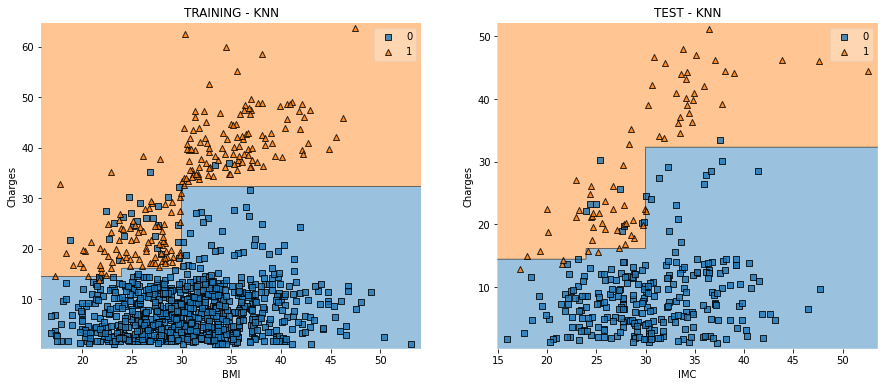

In [32]:
# Decisions regions:

from sklearn.model_selection import train_test_split 
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

X = data[['bmi', 'charges']]
y = data['smoker']

Xtraining, Xtest, ytraining, ytest  = train_test_split(X, y, test_size = 0.25)
 
model.fit(Xtraining, ytraining)

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
plot_decision_regions(Xtraining.values, ytraining.values, clf = model, legend = 1)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('TRAINING - KNN')  

plt.subplot(1, 2, 2)
plot_decision_regions(Xtest.values, ytest.values, clf = model, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Charges')
plt.title('TEST - KNN')   

plt.show()

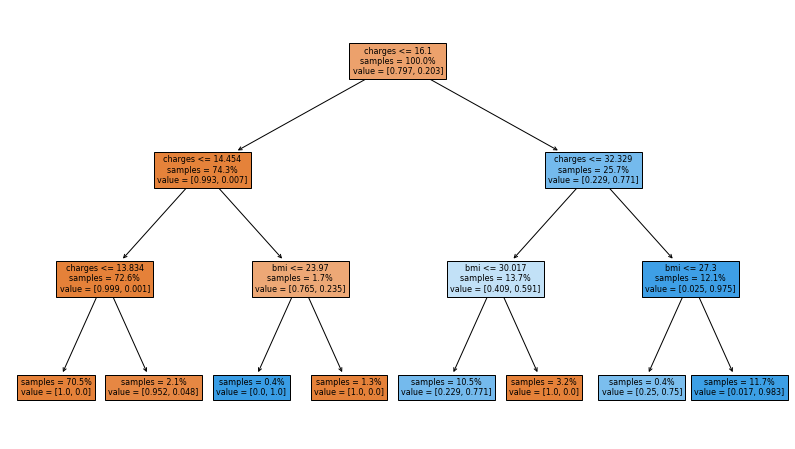

In [33]:

# Plot 

from sklearn.tree import plot_tree

plt.figure(figsize = (14, 8))
plot_tree(model, filled=True, proportion = True, impurity = False, feature_names = X.columns)
plt.show()

#### Comparing the Models by the K-Fold Cross Validation 

In [35]:
X = data[['bmi', 'charges']]
y = data['smoker']

models = [LogisticRegression(), 
           KNeighborsClassifier(n_neighbors = 5), 
           KNeighborsClassifier(n_neighbors = 15),
           KNeighborsClassifier(n_neighbors = 25),
           KNeighborsClassifier(n_neighbors = 35),
           KNeighborsClassifier(n_neighbors = 45),
           DecisionTreeClassifier(max_depth = 1),
           DecisionTreeClassifier(max_depth = 2),
           DecisionTreeClassifier(max_depth = 3),
           DecisionTreeClassifier(max_depth = 4),
           DecisionTreeClassifier(max_depth = 5)]

names = ['Logistic Regression',
         'KNN - K = 5', 
         'KNN - K = 15', 
         'KNN - K = 25', 
         'KNN - K = 35', 
         'KNN - K = 45',
         'Tree Decision - Prof = 1',
         'Tree Decision  - Prof = 2',
         'Tree Decision  - Prof = 3',
         'Tree Decision  - Prof = 4',
         'Tree Decision - Prof = 5']

accs = []
sens = []
vpps = []

for models in models:
    results = cross_validate(model, X, y, cv = validation, scoring = ['accuracy', 'recall', 'precision']) 
    accs.append(results['test_accuracy'].mean())
    sens.append(results['test_recall'].mean())
    vpps.append(results['test_precision'].mean())

aux = {'Accuracy': accs, 'Sensitivity': sens, 'Precision': vpps}
results = pd.DataFrame(aux, index = names)
results.sort_values(by = 'Precision', ascending = False).round(4)

,Accuracy,Sensitivity,Precision
Tree Decision - Prof = 1,0.9641,0.9663,0.8751
Tree Decision - Prof = 5,0.9626,0.9599,0.8738
KNN - K = 25,0.9626,0.9654,0.8698
KNN - K = 45,0.9619,0.9568,0.8696
Tree Decision - Prof = 4,0.9626,0.9654,0.8682
Tree Decision - Prof = 2,0.9619,0.9595,0.8668
Logistic Regression,0.9619,0.9685,0.8649
KNN - K = 5,0.9611,0.9635,0.8633
KNN - K = 35,0.9634,0.9685,0.8630
KNN - K = 15,0.9604,0.9644,0.8621
